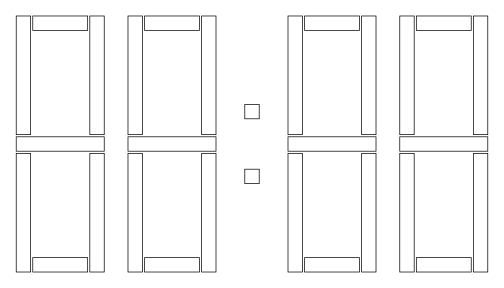

In [2]:
import drawSvg as draw
from copy import deepcopy

DRAWING_HEIGHT = 4
DRAWING_WIDTH = 7

digit_height = 3.556
digit_width = 1.2224
digit_spacing = 0.33
segment_spacing = 0.03
segment_thickness = 0.2

verticle_segment_height = (digit_height - segment_thickness - (2 * segment_spacing))/2
horizontal_segment_width =  digit_width - (2 * segment_spacing) - (2 * segment_thickness)

d = draw.Drawing(DRAWING_WIDTH, DRAWING_HEIGHT, stroke_width=.01, stroke='black', fill='none')

right_pos_offset = segment_thickness + horizontal_segment_width + (2 * segment_spacing)
top_pos_offset = verticle_segment_height + segment_thickness + (segment_spacing * 2)
horizonal_segment_left_offset = segment_thickness + segment_spacing

segment_group = draw.Group()
segment_group.extend([
    draw.Rectangle(0, 0, segment_thickness, verticle_segment_height),
    draw.Rectangle(right_pos_offset, 0, segment_thickness, verticle_segment_height),
    draw.Rectangle(0, top_pos_offset, segment_thickness, verticle_segment_height),
    draw.Rectangle(right_pos_offset, top_pos_offset, segment_thickness, verticle_segment_height),
    
    draw.Rectangle(horizonal_segment_left_offset, 0, horizontal_segment_width, segment_thickness),
    draw.Rectangle(
        horizonal_segment_left_offset, top_pos_offset + verticle_segment_height
        - segment_thickness, horizontal_segment_width, segment_thickness
    ),
    
    draw.Rectangle(0, verticle_segment_height + segment_spacing, digit_width, segment_thickness),    
])

colon_distance = 0.7
colon_horizontal_margin = 0.4

colon_group = draw.Group()
colon_group.height = colon_distance + (2 * segment_thickness)
colon_group.extend([
    draw.Rectangle(0, 0, segment_thickness, segment_thickness),
    draw.Rectangle(0, colon_distance + segment_thickness, segment_thickness, segment_thickness),
])

digit_1_x_offset = 0
digit_2_x_offset = digit_width + digit_spacing
colon_x_offset = (digit_2_x_offset + digit_width
                  + colon_horizontal_margin)
digit_3_x_offset = segment_thickness + colon_x_offset + colon_horizontal_margin
digit_4_x_offset = digit_3_x_offset + digit_width + digit_spacing

digit_one = deepcopy(segment_group)
digit_two = deepcopy(segment_group)
digit_two.args['transform'] = f"translate({digit_2_x_offset} 0)"
colon_group.args['transform'] = "translate({} {})".format(
    colon_x_offset,
    -((digit_height / 2)) + (colon_group.height / 2)
)
digit_three = deepcopy(segment_group)
digit_three.args['transform'] = f"translate({digit_3_x_offset} 0)"
digit_four = deepcopy(segment_group)
digit_four.args['transform'] = f"translate({digit_4_x_offset} 0)"

display_group = draw.Group()
display_group.extend([
    digit_one,
    digit_two,
    colon_group,
    digit_three,
    digit_four
])

display_group.args['transform'] = "translate({} {})".format(
    (DRAWING_WIDTH - (digit_4_x_offset + digit_width)) / 2,
    -((DRAWING_HEIGHT - digit_height) / 2)
)

# d.append(colon_group)
d.append(display_group)

d.setPixelScale(72)  # Set number of pixels per geometry unit
d.saveSvg('clock_face.svg')
# Display in iPython notebook
d.rasterize()  # Display as PNG
d  # Display as SVG
